In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#funkcije

def sigmoid(x):
    return 1/(1+ np.e**(-x))

#fja greske
def E(X,Y):
    return np.sum((np.sum(X)-Y)**2)

#izvod od E po w, parametar k je sloj
def dE(k):
    return 2*h[k]

#regularizacija
def omega(W,reg_param):
    S = 0;
    for i in range(0,L):
        S+=np.sum(W[i]**2)
    return reg_param*S

#fja cene
def Cost(X,Y,W,reg_param):
    return E(X,Y)*0.5 + 0.5*omega(W,reg_param)

#forward pass
def forward(X,Y,a,h,W,B,L,e,o,c):
    for i in range(0,L):
        if (i == 0):
            a[i] = X
            h[i] = X
        elif (i == L-1):
            a[i] = W[i].dot(h[i-1]) + B[i]
            h[i] = a[i]
        else:
            a[i] = W[i].dot(h[i-1]) + B[i]
            h[i] = sigmoid(a[i])

    e = E(h[L-1],Y)
    o = omega(W,reg_param)
    c = Cost(h[L-1],Y,W,reg_param)
    return (a,h,e,o,c)

#backward pass
def back(h,W,dW,dB,L,reg_param):
    d = 0.5*dE(L-1)
    k = L-1
    while k>=0:
        if(k == L-1):
            d = d
        else:
            d = d * ((1 - h[k])*(h[k]))

        dB[k] = d 

        if k>0:
            dW[k] = d.dot(h[k-1].T)  + reg_param*W[k]
        else:
            dW[k] = d + reg_param*W[k]
        d = W[k].T.dot(d)    
        k= k-1
    return (dW,dB)

#fja radi forward pass, pa backward pass i menja vrednost W i B na osnovu gradijenta i brzine ucenja
def iteracija(X,Y,a,h,W,B,L,e,o,c,dW,dB,reg_param,ni):
    (a,h,e,o,c) = forward(X,Y,a,h,W,B,L,e,o,c)
    (dW,dB) = back(h,W,dW,dB,L,reg_param)
    W = W - ni * dW
    B = B - ni * dB
    return (X,a,h,W,B,L,e,o,c,dW,dB)


In [18]:
#inicijalizacije
#ulazni podaci
reg_param = 0.01

#L broj slojeva
L = 2
# N broj ulaza
N = 1

#batch size, radi samo za n=1
n=1

#brzina ucenja
ni = 0.01

input_size = 1000
test_size = 500

In [19]:
#ulaz
#X = np.random.randn(N,n)
XX = np.empty(input_size)
for i in range (0,input_size):
    XX[i] = np.random.randn()


In [20]:
#ocekivane vrednosti
Y = np.sin(XX)
#Y = -11*np.ones((N,n))

In [21]:
#tezine
W = np.empty([L,N,N])
for i in range (0,L):
    W[i]= np.random.randn(N,N)
#W = [ np.zeros((N,N)), np.ones((N,N)), np.ones((N,N))]

In [22]:
#bias
B = np.empty([L,N,n])
for i in range (0,L):
    B[i]= np.random.randn(N,n)

In [23]:
#init ostalog

#sume W*h
a = np.empty([L,N,n])

# h = sigmoid(a)
h = np.empty([L,N,n])

#greska
e= 0

#regularizcija
o = 0
# c = e +o
c = 0
dW = np.zeros([L,N,N])
dB = np.zeros([L,N,n])


#cene iteracija 
niz = np.empty(input_size)

#iteracije

for i in range(0,input_size):
    (XX[i],a,h,W,B,L,e,o,c,dW,dB)=iteracija(XX[i],Y[i],a,h,W,B,L,e,o,c,dW,dB,reg_param,ni)
    niz[i] = e
    

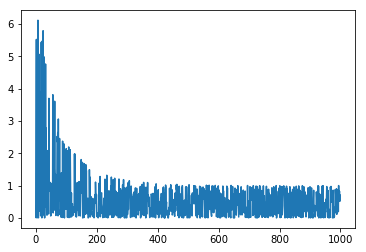

In [24]:
# broj iteracije na x osi, cena na y
plt.plot(np.arange(input_size),niz)
#plt.plot(np.arange(O),np.log(niz))

In [25]:
#test skup ulaz
XXt = np.empty(test_size)
for i in range (0,test_size):
    XXt[i] = np.random.randn()

In [26]:
#tesk skup  ocekivan izlaz
Yt = np.sin(XXt)

In [27]:
#testiranje
nizT = np.empty(test_size)
for i in range(0,test_size):
    (a,h,e,o,c)=forward(XXt[i],Yt[i],a,h,W,B,L,e,o,c)
    nizT[i] = np.sum(h)

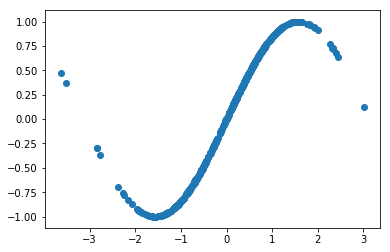

In [28]:

plt.scatter( nizT, Yt)
#plt.xlim([-1,1])

3.5627292469229004